In [1]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker


In [2]:
file_path = "../Resources.2/general_dataset.csv"
df= pd.read_csv(file_path)
df.head()

,country_code,country_name,year,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,...,economic_damages_from_storms_as_a_share_of_gdp,economic_damages_from_wildfires,economic_damages_as_a_share_of_gdp,economic_damages,economic_damages_thousands,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
0,AFG,Afghanistan,1971,NaN,NaN,1893554,NaN,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,2.665129,11475450,0.652
1,AFG,Afghanistan,1972,NaN,NaN,1530347,NaN,0.0,0.0,150.0,...,0.0,0.0,0.000000,0.0,0.0,2120.261216,150.0,2.714539,11791222,-1.089
2,AFG,Afghanistan,1976,NaN,NaN,1980859,NaN,0.0,0.0,51.0,...,0.0,0.0,0.000000,0.0,0.0,618.094723,51.0,1.981389,12943093,-0.295
3,AFG,Afghanistan,1978,NaN,NaN,2153300,NaN,0.0,0.0,120.0,...,0.0,0.0,0.393939,52000.0,52000.0,1979.191965,120.0,1.281715,13341199,0.105
4,AFG,Afghanistan,1980,NaN,NaN,1756302,NaN,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,224.601333,0.0,-0.407658,13356500,0.690


In [3]:
bhs_df= df[(df['country_name'] == 'Bahamas')]
bhs_df.head()

,country_code,country_name,year,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,...,economic_damages_from_storms_as_a_share_of_gdp,economic_damages_from_wildfires,economic_damages_as_a_share_of_gdp,economic_damages,economic_damages_thousands,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
393,BHS,Bahamas,1988,NaN,NaN,1538880,1.484311,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.706120,247451,0.490
394,BHS,Bahamas,1990,124755975.2,2.208528,2022528,5.073711,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.767491,256227,0.832
395,BHS,Bahamas,1992,133825895.0,2.663011,1868640,3.905565,0.0,0.0,0.0,...,8.041171,0.0,2.010293,250000.0,250000.0,0.0,4.0,1.905434,266028,0.349
396,BHS,Bahamas,1995,145640936.8,2.834150,1839328,0.802435,0.0,0.0,0.0,...,0.011665,0.0,0.002916,400.0,400.0,0.0,0.0,1.557507,280179,0.736
397,BHS,Bahamas,1999,122748871.3,1.267590,2033520,0.223913,0.0,0.0,0.0,...,5.856424,0.0,1.464106,450000.0,450000.0,0.0,1.0,1.184628,294063,0.704


In [4]:
bhs_df= bhs_df.drop(['country_name'], axis=1)
bhs_df.columns.tolist()

['country_code',
 'year',
 'agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'deaths_from_drought',
 'deaths_from_extreme_temps',
 'deaths_from_floods',
 'deaths_from_storms',
 'deaths_from_wildfires',
 'people_affected_by_drought_per_100k',
 'people_affected_by_extreme_temperatures_per_100k',
 'people_affected_by_floods_per_100k',
 'people_affected_by_storms_per_100k',
 'people_affected_by_wildfires_per_100k',
 'economic_damages_from_drought',
 'economic_damages_from_drought_as_a_share_of_gdp',
 'economic_damages_from_extreme_temperatures',
 'economic_damages_from_extreme_temperatures_as_a_share_of_gdp',
 'economic_damages_from_floods',
 'economic_damages_from_floods_as_a_share_of_gdp',
 'economic_damages_from_storms',
 'economic_damages_from_storms_as_a_share_of_gdp',
 'economic_damages_from_wildfires',
 'economic_damages_as_a_share_of_gdp',
 'economic_damages',
 'economic_damages_thous

In [5]:
bhs_df= bhs_df[(bhs_df['year'] >= 1988) & (bhs_df['year'] <= 2020)]
bhs_df.set_index('year',inplace = True)
bhs_df.head(10)

,country_code,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,deaths_from_storms,deaths_from_wildfires,...,economic_damages_from_storms_as_a_share_of_gdp,economic_damages_from_wildfires,economic_damages_as_a_share_of_gdp,economic_damages,economic_damages_thousands,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,,,,,,,,,,,,,,,
1988,BHS,NaN,NaN,1538880,1.484311,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,1.706120,247451,0.490
1990,BHS,124755975.2,2.208528,2022528,5.073711,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,1.767491,256227,0.832
1992,BHS,133825895.0,2.663011,1868640,3.905565,0.0,0.0,0.0,4.0,0.0,...,8.041171,0.0,2.010293,250000.0,250000.0,0.000000,4.0,1.905434,266028,0.349
1995,BHS,145640936.8,2.834150,1839328,0.802435,0.0,0.0,0.0,0.0,0.0,...,0.011665,0.0,0.002916,400.0,400.0,0.000000,0.0,1.557507,280179,0.736
1999,BHS,122748871.3,1.267590,2033520,0.223913,0.0,0.0,0.0,1.0,0.0,...,5.856424,0.0,1.464106,450000.0,450000.0,0.000000,1.0,1.184628,294063,0.704
2001,BHS,138759593.7,1.198630,1945584,0.353982,0.0,0.0,0.0,0.0,0.0,...,3.606710,0.0,0.901677,300000.0,300000.0,0.000000,0.0,1.522680,302618,0.229
2004,BHS,158473476.3,1.161752,2048176,1.194630,0.0,0.0,0.0,12.0,0.0,...,17.117066,0.0,4.279267,1550000.0,1550000.0,2821.316614,12.0,1.825954,318893,0.420
2005,BHS,143660835.2,1.064435,1905280,5.056846,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,461.538462,1.0,1.850176,324848,0.480
2007,BHS,121659706.5,1.093391,1872304,2.947322,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,2077.151335,1.0,1.901559,337387,0.973


In [6]:
bhs_df = bhs_df.drop([
 'country_code',
 'deaths_from_drought',
 'deaths_from_extreme_temps',
 'deaths_from_floods',
 'deaths_from_storms',
 'deaths_from_wildfires',
 'people_affected_by_drought_per_100k',
 'people_affected_by_extreme_temperatures_per_100k',
 'people_affected_by_floods_per_100k',
 'people_affected_by_storms_per_100k',
 'people_affected_by_wildfires_per_100k',
 'economic_damages_from_drought',
 'economic_damages_from_drought_as_a_share_of_gdp',
 'economic_damages_from_extreme_temperatures',
 'economic_damages_from_extreme_temperatures_as_a_share_of_gdp',
 'economic_damages_from_floods',
 'economic_damages_from_floods_as_a_share_of_gdp',
 'economic_damages_from_storms',
 'economic_damages_from_storms_as_a_share_of_gdp',
 'economic_damages_from_wildfires',
 'economic_damages',
 'economic_damages_thousands',
], axis=1)
bhs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 1988 to 2019
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   agriculture_value_added_constants               16 non-null     float64
 1   agriculture_value_added_percentage_gdp          16 non-null     float64
 2   annual_co2_emissions_tons                       17 non-null     int64  
 3   inflation_inflation_gdp_deflation               17 non-null     float64
 4   economic_damages_as_a_share_of_gdp              17 non-null     float64
 5   people_affected_per_100k                        17 non-null     float64
 6   number_of_deaths                                17 non-null     float64
 7   population_population_growth_annual_percentage  17 non-null     float64
 8   population_population_total                     17 non-null     int64  
 9   temperature_change_temp_change_celsius  

In [7]:
bhs_df.columns.tolist()

['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'economic_damages_as_a_share_of_gdp',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']

C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Us

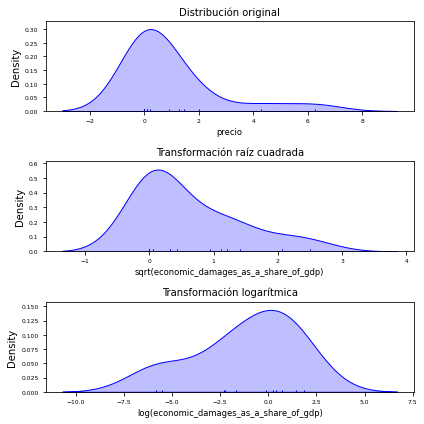

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sb.distplot(
    bhs_df.economic_damages_as_a_share_of_gdp,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sb.distplot(
    np.sqrt(bhs_df.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sb.distplot(
    np.log(bhs_df.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [9]:
from fitter import Fitter
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic', 'lognorm']

fitter = Fitter(bhs_df.economic_damages_as_a_share_of_gdp, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,14.553494,1120.969879,3.024928,inf,0.435469,0.001893
gamma,24.901976,898.456376,14.989115,inf,0.352940,0.021250
exponpow,29.312974,670.457970,17.761527,inf,0.352941,0.021249
beta,38.818275,542.162375,25.369376,inf,0.352941,0.021249
powerlaw,39.641890,484.268530,22.893082,inf,0.371899,0.012827
chi2,48.220754,475.352777,26.223435,inf,0.469886,0.000579
expon,52.473215,640.899089,24.826948,inf,0.484819,0.000334
lognorm,52.541486,888.961462,27.682265,inf,0.447623,0.001261
logistic,61.097947,680.845252,27.413930,inf,0.316616,0.051575
norm,62.414470,564.644719,27.776351,inf,0.323120,0.044342


Pairplot() function from the Seaborn library will output a figure containing histogram and scatter plot between each variable.

In [59]:
# Visualize the data using scatter plot and histogram
#sb.set_palette('colorblind')
#sb.pairplot(data=hti_df, height=3)

In [10]:
bhs_df.corr ()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
agriculture_value_added_constants,1.000000,0.541143,-0.655359,0.033961,-0.251362,-0.280286,-0.634771,0.742271,-0.693417,-0.819460
agriculture_value_added_percentage_gdp,0.541143,1.000000,-0.492928,0.181168,-0.179152,-0.420459,-0.313920,0.519261,-0.851210,-0.409076
annual_co2_emissions_tons,-0.655359,-0.492928,1.000000,-0.053241,0.384415,0.365605,0.535795,-0.660646,0.661878,0.349740
inflation_inflation_gdp_deflation,0.033961,0.181168,-0.053241,1.000000,-0.177180,-0.123556,-0.038186,0.266088,-0.144981,0.057766
economic_damages_as_a_share_of_gdp,-0.251362,-0.179152,0.384415,-0.177180,1.000000,0.617377,0.780668,-0.107040,0.165387,0.238782
people_affected_per_100k,-0.280286,-0.420459,0.365605,-0.123556,0.617377,1.000000,0.630873,-0.055328,0.435774,0.299713
number_of_deaths,-0.634771,-0.313920,0.535795,-0.038186,0.780668,0.630873,1.000000,-0.316171,0.354882,0.545103
population_population_growth_annual_percentage,0.742271,0.519261,-0.660646,0.266088,-0.107040,-0.055328,-0.316171,1.000000,-0.686079,-0.516695
population_population_total,-0.693417,-0.851210,0.661878,-0.144981,0.165387,0.435774,0.354882,-0.686079,1.000000,0.579247
temperature_change_temp_change_celsius,-0.819460,-0.409076,0.349740,0.057766,0.238782,0.299713,0.545103,-0.516695,0.579247,1.000000


In [11]:
bhs_corr_df = bhs_df.corr(method='spearman')

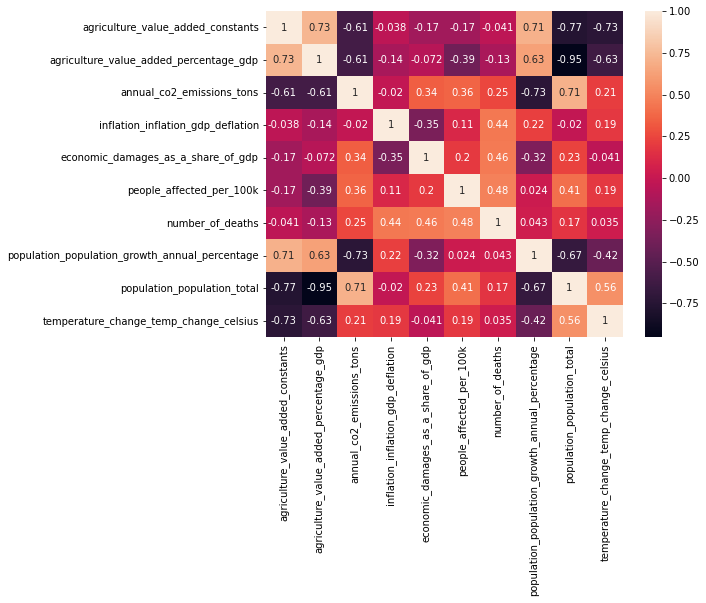

In [12]:
plt.figure(figsize=(8, 6))
sb.heatmap(bhs_corr_df, annot=True)
plt.show()

### CORRELATION TESTS

El análisis gráfico hecho previamente y los test estadísticos mostraron evidencias de que no se puede asumir normalidad en las variables de desastres. Siendo estrictos, este hecho excluye la posibilidad de utilizar el coeficiente de Pearson, dejando como alternativas el de Spearman o Kendall. Sin embargo, dado que la distribución no se aleja mucho de la normalidad y de que el coeficiente de Pearson tiene cierta robustez, a fines prácticos sí que se podría utilizar siempre y cuando se tenga en cuenta este hecho y se comunique en los resultados. Otra posibilidad es tratar de transformar las variables para mejorar su distribución, por ejemplo, aplicando el logaritmo.

In [13]:
print('Correlación Pearson: ', bhs_df['temperature_change_temp_change_celsius'].corr(bhs_df['population_population_total'], method='pearson'))
print('Correlación spearman: ', bhs_df['temperature_change_temp_change_celsius'].corr(bhs_df['population_population_total'], method='spearman'))
print('Correlación kendall: ', bhs_df['temperature_change_temp_change_celsius'].corr(bhs_df['population_population_total'], method='kendall'))

Correlación Pearson:  0.5792473193828194
Correlación spearman:  0.556372549019608
Correlación kendall:  0.41176470588235287


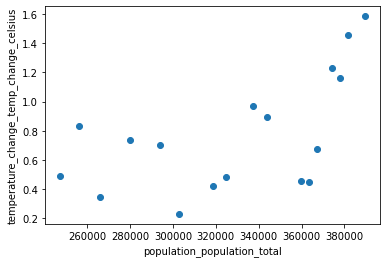

In [14]:
plt.scatter(bhs_df.population_population_total , bhs_df.temperature_change_temp_change_celsius )
plt.xlabel('population_population_total')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [15]:
print('Correlación Pearson: ', bhs_df['temperature_change_temp_change_celsius'].corr(bhs_df['population_population_growth_annual_percentage'], method='pearson'))
print('Correlación spearman: ', bhs_df['temperature_change_temp_change_celsius'].corr(bhs_df['population_population_growth_annual_percentage'], method='spearman'))
print('Correlación kendall: ', bhs_df['temperature_change_temp_change_celsius'].corr(bhs_df['population_population_growth_annual_percentage'], method='kendall'))

Correlación Pearson:  -0.5166953338494039
Correlación spearman:  -0.42156862745098045
Correlación kendall:  -0.24999999999999997


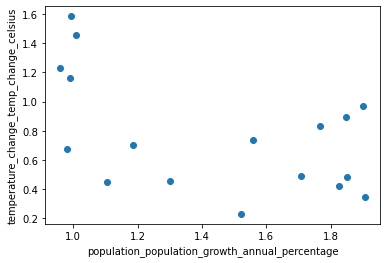

In [16]:
plt.scatter(bhs_df.population_population_growth_annual_percentage, bhs_df.temperature_change_temp_change_celsius )
plt.xlabel('population_population_growth_annual_percentage')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [17]:
print('Correlación Pearson: ', bhs_df['temperature_change_temp_change_celsius'].corr(bhs_df['annual_co2_emissions_tons'], method='pearson'))
print('Correlación spearman: ', bhs_df['temperature_change_temp_change_celsius'].corr(bhs_df['annual_co2_emissions_tons'], method='spearman'))
print('Correlación kendall: ', bhs_df['temperature_change_temp_change_celsius'].corr(bhs_df['annual_co2_emissions_tons'], method='kendall'))

Correlación Pearson:  0.3497399047625462
Correlación spearman:  0.21078431372549022
Correlación kendall:  0.14705882352941174


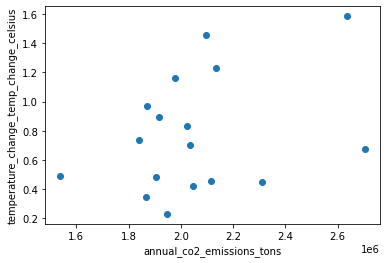

In [18]:
plt.scatter(bhs_df.annual_co2_emissions_tons, bhs_df.temperature_change_temp_change_celsius )
plt.xlabel('annual_co2_emissions_tons')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [19]:
print('Correlación Pearson: ', bhs_df['temperature_change_temp_change_celsius'].corr(bhs_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', bhs_df['temperature_change_temp_change_celsius'].corr(bhs_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', bhs_df['temperature_change_temp_change_celsius'].corr(bhs_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  0.2387823620659358
Correlación spearman:  -0.04133741772765992
Correlación kendall:  -0.023386170701251204


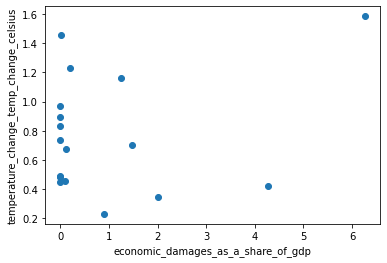

In [20]:
plt.scatter(bhs_df.economic_damages_as_a_share_of_gdp, bhs_df.temperature_change_temp_change_celsius )
plt.xlabel('economic_damages_as_a_share_of_gdp')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [71]:
# Correlación sin outlier
#r, p = stats.pearsonr(np.delete(a, 5), np.delete(b, 5))
#print(f"Correlación Pearson sin outlier: r={r}, p-value={p}")

In [21]:
print('Correlación Pearson: ', bhs_df['temperature_change_temp_change_celsius'].corr(bhs_df['number_of_deaths'], method='pearson'))
print('Correlación spearman: ', bhs_df['temperature_change_temp_change_celsius'].corr(bhs_df['number_of_deaths'], method='spearman'))
print('Correlación kendall: ', bhs_df['temperature_change_temp_change_celsius'].corr(bhs_df['number_of_deaths'], method='kendall'))

Correlación Pearson:  0.5451027025186261
Correlación spearman:  0.034750912326237705
Correlación kendall:  0.0


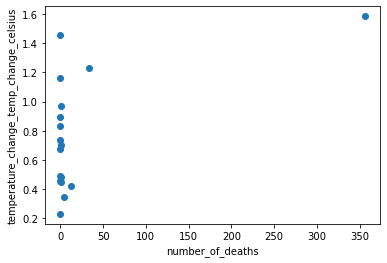

In [22]:
plt.scatter(bhs_df.number_of_deaths, bhs_df.temperature_change_temp_change_celsius )
plt.xlabel('number_of_deaths')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [74]:
# Correlación sin outlier
#Pendiente


In [24]:
print('Correlación Pearson: ', bhs_df['number_of_deaths'].corr(bhs_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', bhs_df['number_of_deaths'].corr(bhs_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', bhs_df['number_of_deaths'].corr(bhs_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  0.7806676787264168
Correlación spearman:  0.45699194721610714
Correlación kendall:  0.3656857145826631


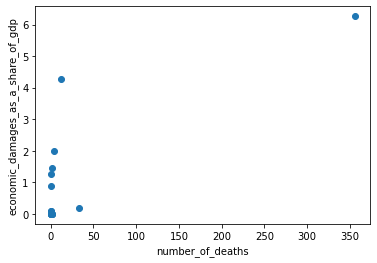

In [25]:
plt.scatter(bhs_df.number_of_deaths, bhs_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('number_of_deaths')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [26]:
print('Correlación Pearson: ', bhs_df['people_affected_per_100k'].corr(bhs_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', bhs_df['people_affected_per_100k'].corr(bhs_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', bhs_df['people_affected_per_100k'].corr(bhs_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  0.6173768482443347
Correlación spearman:  0.19802622978918424
Correlación kendall:  0.14545454545454548


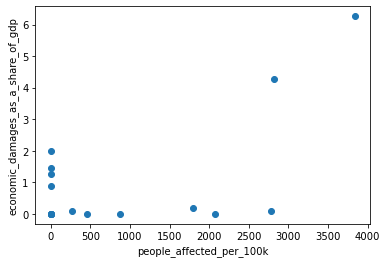

In [27]:
plt.scatter(bhs_df.people_affected_per_100k, bhs_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('people_affected_per_100k')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [80]:
# Correlación sin outlier
#Pendiente


In [28]:
print('Correlación Pearson: ', bhs_df['economic_damages_as_a_share_of_gdp'].corr(bhs_df['inflation_inflation_gdp_deflation'], method='pearson'))
print('Correlación spearman: ', bhs_df['economic_damages_as_a_share_of_gdp'].corr(bhs_df['inflation_inflation_gdp_deflation'], method='spearman'))
print('Correlación kendall: ', bhs_df['economic_damages_as_a_share_of_gdp'].corr(bhs_df['inflation_inflation_gdp_deflation'], method='kendall'))

Correlación Pearson:  -0.1771804369343872
Correlación spearman:  -0.3469837791079332
Correlación kendall:  -0.25724787771376323


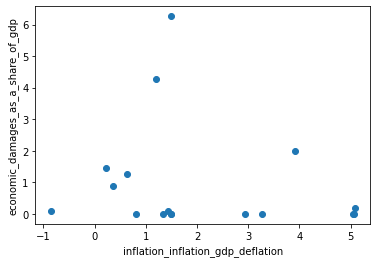

In [29]:
plt.scatter(bhs_df.inflation_inflation_gdp_deflation, bhs_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('inflation_inflation_gdp_deflation')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [30]:
print('Correlación Pearson: ', bhs_df['inflation_inflation_gdp_deflation'].corr(bhs_df['agriculture_value_added_constants'], method='pearson'))
print('Correlación spearman: ', bhs_df['inflation_inflation_gdp_deflation'].corr(bhs_df['agriculture_value_added_constants'], method='spearman'))
print('Correlación kendall: ', bhs_df['inflation_inflation_gdp_deflation'].corr(bhs_df['agriculture_value_added_constants'], method='kendall'))

Correlación Pearson:  0.033960749406377874
Correlación spearman:  -0.03823529411764706
Correlación kendall:  0.0


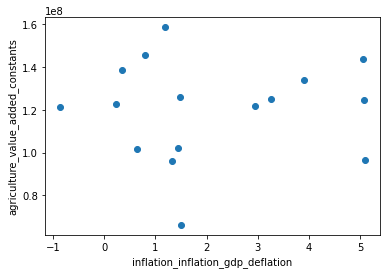

In [31]:
plt.scatter(bhs_df.inflation_inflation_gdp_deflation, bhs_df.agriculture_value_added_constants)
plt.xlabel('inflation_inflation_gdp_deflation')
plt.ylabel('agriculture_value_added_constants')
plt.show()

In [32]:
# Cálculo de correlación y significancia con Scipy
# ==============================================================================
r, p = stats.pearsonr(bhs_df['temperature_change_temp_change_celsius'], bhs_df['population_population_total'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(bhs_df['temperature_change_temp_change_celsius'], bhs_df['population_population_total'], nan_policy='omit')
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(bhs_df['temperature_change_temp_change_celsius'], bhs_df['population_population_total'], nan_policy='omit')
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.5792473193828191, p-value=0.014822144282046331
Correlación Spearman: r=0.556372549019608, p-value=0.02037058662451899
Correlación Pearson: r=0.41176470588235287, p-value=0.02172533125679204


## Normalizando una variable 

In [33]:
normalized_ND_2 = bhs_df['number_of_deaths']/np.linalg.norm(bhs_df['number_of_deaths'])
bhs_df = bhs_df.assign(normalized_ND_2=normalized_ND_2)
bhs_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2
year,,,,,,,,,,,
1988,NaN,NaN,1538880,1.484311,0.000000,0.0,0.0,1.706120,247451,0.490,0.000000
1990,124755975.2,2.208528,2022528,5.073711,0.000000,0.0,0.0,1.767491,256227,0.832,0.000000
1992,133825895.0,2.663011,1868640,3.905565,2.010293,0.0,4.0,1.905434,266028,0.349,0.011181
1995,145640936.8,2.834150,1839328,0.802435,0.002916,0.0,0.0,1.557507,280179,0.736,0.000000
1999,122748871.3,1.267590,2033520,0.223913,1.464106,0.0,1.0,1.184628,294063,0.704,0.002795


In [34]:
print('Correlación Pearson: ', bhs_df['temperature_change_temp_change_celsius'].corr(bhs_df['normalized_ND_2'], method='pearson'))
print('Correlación spearman: ', bhs_df['temperature_change_temp_change_celsius'].corr(bhs_df['normalized_ND_2'], method='spearman'))
print('Correlación kendall: ', bhs_df['temperature_change_temp_change_celsius'].corr(bhs_df['normalized_ND_2'], method='kendall'))

Correlación Pearson:  0.545102702518626
Correlación spearman:  0.034750912326237705
Correlación kendall:  0.0


In [35]:
normalized_EDPGDP = bhs_df['economic_damages_as_a_share_of_gdp']/np.linalg.norm(bhs_df['economic_damages_as_a_share_of_gdp'])
bhs_df = bhs_df.assign(normalized_EDPGDP=normalized_EDPGDP)
bhs_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2,normalized_EDPGDP
year,,,,,,,,,,,,
1988,NaN,NaN,1538880,1.484311,0.000000,0.0,0.0,1.706120,247451,0.490,0.000000,0.000000
1990,124755975.2,2.208528,2022528,5.073711,0.000000,0.0,0.0,1.767491,256227,0.832,0.000000,0.000000
1992,133825895.0,2.663011,1868640,3.905565,2.010293,0.0,4.0,1.905434,266028,0.349,0.011181,0.247199
1995,145640936.8,2.834150,1839328,0.802435,0.002916,0.0,0.0,1.557507,280179,0.736,0.000000,0.000359
1999,122748871.3,1.267590,2033520,0.223913,1.464106,0.0,1.0,1.184628,294063,0.704,0.002795,0.180036


In [36]:
# Set independent and dependent variables
X = bhs_df[['population_population_total','temperature_change_temp_change_celsius','annual_co2_emissions_tons']]
y = bhs_df['normalized_EDPGDP']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

y_pred = regr.predict(X)
print(y_pred.shape)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

(17,)
Intercept: -0.30868816452439546
Coefficients: [-1.42681828e-06  1.31469651e-01  3.86907654e-07]


In [37]:
X = bhs_df[['population_population_total','temperature_change_temp_change_celsius','annual_co2_emissions_tons']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(bhs_df['normalized_EDPGDP'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:      normalized_EDPGDP   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.085
Date:                Sat, 27 Aug 2022   Prob (F-statistic):              0.390
Time:                        17:17:24   Log-Likelihood:                 4.2423
No. Observations:                  17   AIC:                           -0.4846
Df Residuals:                      13   BIC:                             2.848
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


In [38]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.20026457048316704


In [39]:
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 1.0851252886028662
Probability of observing value at least as high as F-statistic: 0.3898734017295165


Because our f_pvalue is lower than 0.05 we can conclude that our model performs better than other simpler model.

In [40]:
print(olsmod.pvalues)

const                                     0.500471
population_population_total               0.434057
temperature_change_temp_change_celsius    0.443791
annual_co2_emissions_tons                 0.152436
dtype: float64


All of our independent variables,  have p-value mayor than 0.05 which shows that there is not sufficient evidence that there variables affects our dependet variable.

In [41]:
# Set independent and dependent variables
X = bhs_df[['normalized_EDPGDP']]
y = bhs_df['inflation_inflation_gdp_deflation']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 2.233916754123957
Coefficients: [-1.49723167]


In [42]:
X = bhs_df[['normalized_EDPGDP']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(bhs_df['inflation_inflation_gdp_deflation'], X).fit()
print(olsmod.summary())

                                    OLS Regression Results                                   
Dep. Variable:     inflation_inflation_gdp_deflation   R-squared:                       0.031
Model:                                           OLS   Adj. R-squared:                 -0.033
Method:                                Least Squares   F-statistic:                    0.4862
Date:                               Sat, 27 Aug 2022   Prob (F-statistic):              0.496
Time:                                       17:18:24   Log-Likelihood:                -33.668
No. Observations:                                 17   AIC:                             71.34
Df Residuals:                                     15   BIC:                             73.00
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                        coef    std err          t      P>|t

C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


In [43]:
print(olsmod.pvalues)

const                0.000646
normalized_EDPGDP    0.496313
dtype: float64


## Encoding

In [44]:
bhs_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2,normalized_EDPGDP
year,,,,,,,,,,,,
1988,NaN,NaN,1538880,1.484311,0.000000,0.0,0.0,1.706120,247451,0.490,0.000000,0.000000
1990,124755975.2,2.208528,2022528,5.073711,0.000000,0.0,0.0,1.767491,256227,0.832,0.000000,0.000000
1992,133825895.0,2.663011,1868640,3.905565,2.010293,0.0,4.0,1.905434,266028,0.349,0.011181,0.247199
1995,145640936.8,2.834150,1839328,0.802435,0.002916,0.0,0.0,1.557507,280179,0.736,0.000000,0.000359
1999,122748871.3,1.267590,2033520,0.223913,1.464106,0.0,1.0,1.184628,294063,0.704,0.002795,0.180036


In [45]:
bhs_df = bhs_df.drop(['normalized_ND_2','normalized_EDPGDP'],axis=1)
bhs_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,,,,
1988,NaN,NaN,1538880,1.484311,0.000000,0.0,0.0,1.706120,247451,0.490
1990,124755975.2,2.208528,2022528,5.073711,0.000000,0.0,0.0,1.767491,256227,0.832
1992,133825895.0,2.663011,1868640,3.905565,2.010293,0.0,4.0,1.905434,266028,0.349
1995,145640936.8,2.834150,1839328,0.802435,0.002916,0.0,0.0,1.557507,280179,0.736
1999,122748871.3,1.267590,2033520,0.223913,1.464106,0.0,1.0,1.184628,294063,0.704


In [46]:
from sklearn.preprocessing import StandardScaler
 
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(bhs_df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
 'agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'economic_damages_as_a_share_of_gdp',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius',
])
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
0,NaN,NaN,-1.887706,-0.319997,-0.568778,-0.710655,-0.288592,0.729006,-1.784962,-0.730484
1,0.199965,1.416858,-0.125584,1.694824,-0.568778,-0.710655,-0.288592,0.894457,-1.591764,0.155607
2,0.605159,2.117414,-0.686259,1.039115,0.603781,-0.710655,-0.240611,1.266342,-1.376002,-1.095802
3,1.132990,2.381215,-0.793054,-0.702750,-0.567077,-0.710655,-0.288592,0.328356,-1.064477,-0.093120
4,0.110298,-0.033538,-0.085535,-1.027489,0.285202,-0.710655,-0.276597,-0.676898,-0.758830,-0.176029


In [47]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   agriculture_value_added_constants               16 non-null     float64
 1   agriculture_value_added_percentage_gdp          16 non-null     float64
 2   annual_co2_emissions_tons                       17 non-null     float64
 3   inflation_inflation_gdp_deflation               17 non-null     float64
 4   economic_damages_as_a_share_of_gdp              17 non-null     float64
 5   people_affected_per_100k                        17 non-null     float64
 6   number_of_deaths                                17 non-null     float64
 7   population_population_growth_annual_percentage  17 non-null     float64
 8   population_population_total                     17 non-null     float64
 9   temperature_change_temp_change_celsius       

### Dependent Variable

La variable "economic_damages_as_a_share_of_gdp" tiene una distribución asimétrica con una cola positiva. Este tipo de distribución suele visualizarse mejor tras aplicar el logarítmica o la raíz cuadrada.

C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Us

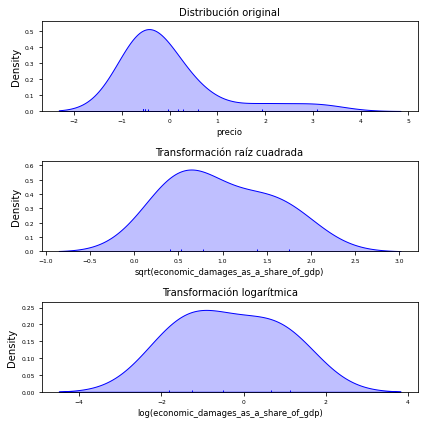

In [48]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sb.distplot(
    df_scaled.economic_damages_as_a_share_of_gdp,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sb.distplot(
    np.sqrt(df_scaled.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sb.distplot(
    np.log(df_scaled.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [49]:
from fitter import Fitter
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic', 'lognorm']

fitter = Fitter(df_scaled.economic_damages_as_a_share_of_gdp, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,42.845578,1012.974205,21.381041,inf,0.435560,0.001888
gamma,78.879186,635.812904,34.589609,inf,0.352940,0.021250
exponpow,96.569409,489.397140,38.029467,inf,0.352881,0.021282
beta,108.864185,484.928744,42.899945,inf,0.348976,0.023529
powerlaw,114.918542,356.220874,40.986813,inf,0.377525,0.010980
chi2,126.879548,408.587441,42.670062,inf,0.445389,0.001361
lognorm,141.304734,738.418145,44.500633,inf,0.351922,0.021816
expon,154.236445,533.080696,43.156075,inf,0.484819,0.000334
logistic,179.587435,573.026859,45.743057,inf,0.316616,0.051575
norm,183.457142,456.826326,46.105478,inf,0.323120,0.044342


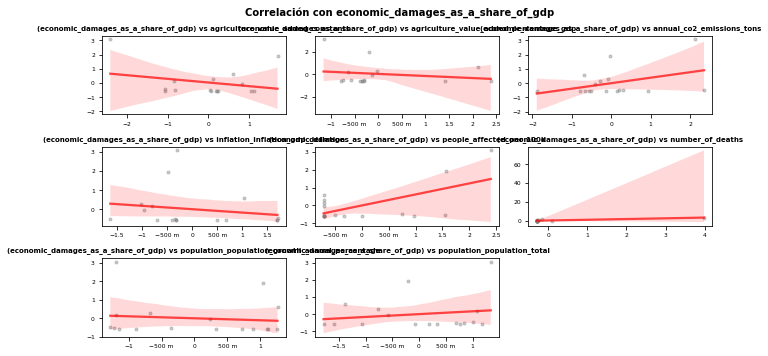

In [50]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df_scaled.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('economic_damages_as_a_share_of_gdp')

for i, colum in enumerate(columnas_numeric):
    sb.regplot(
        x           = df_scaled[colum],
        y           = df_scaled['economic_damages_as_a_share_of_gdp'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"(economic_damages_as_a_share_of_gdp) vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con economic_damages_as_a_share_of_gdp', fontsize = 10, fontweight = "bold");

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

### ROBUST MODELS

### linear regression on a dataset with outliers

(17, 1) (17,)


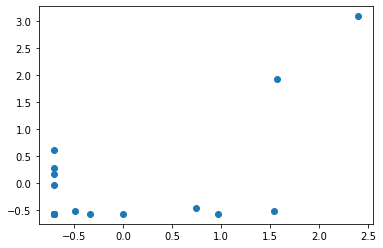

In [51]:
# linear regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# summarize shape
print(X.shape, y.shape)
# scatter plot of input vs output
pyplot.scatter(X, y)
pyplot.show()

Mean MAE: 0.760 (0.587)
The parameters of the line: [0.61737685]


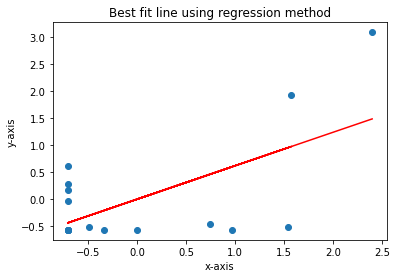

In [52]:
# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)


# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = LinearRegression()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))


# Calculating the parameters using the least square method
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(f'The parameters of the line: {theta}')

# Now, calculating the y-axis values against x-values according to
# the parameters theta0 and theta1
y_line = X.dot(theta)
plt.scatter(X, y)
plt.plot(X, y_line, 'r')
plt.title('Best fit line using regression method')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.show()

### Huber regression on a dataset with outliers - Robust model-
La regresión de Huber es un tipo de regresión robusta que es consciente de la posibilidad de valores atípicos en un conjunto de datos y les asigna menos peso que otros ejemplos en el conjunto de datos.

Podemos usar la regresión de Huber a través de la clase HuberRegressor en scikit-learn. El argumento " épsilon " controla lo que se considera un valor atípico, donde los valores más pequeños consideran más valores atípicos de los datos y, a su vez, hacen que el modelo sea más robusto para los valores atípicos. El valor predeterminado es 1,35.

In [53]:
# huber regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
 
# load dataset
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = HuberRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))




Mean MAE: 0.822 (0.615)


### Regresión RANSAC

Random Sample Consensus , o RANSAC para abreviar, es otro algoritmo de regresión robusto.

RANSAC intenta separar los datos en valores atípicos e internos y ajusta el modelo en los valores internos.

La biblioteca scikit-learn proporciona una implementación a través de la clase RANSACRegressor .

In [54]:
# ransac regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
 
# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
evaluate_model(X, y, model).any()
 
# load dataset
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = RANSACRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
# plot the line of best fit


Mean MAE: 0.545 (0.708)


### Regresión de Theil Sen
La regresión de Theil Sen implica ajustar modelos de regresión múltiple en subconjuntos de los datos de entrenamiento y combinar los coeficientes al final.

El scikit-learn proporciona una implementación a través de la clase TheilSenRegressor .

In [55]:
# theilsen regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import TheilSenRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

print(X.shape)
print(y.shape)

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
 
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fit the model on all data
	model.fit(X.values.reshape(-1, 1), y)
	# calculate outputs for grid across the domain
	y_pred = model.predict(X.values.reshape(-1, 1))
	# plot the line of best fit
	pyplot.plot(X, y_pred, label=type(model).__name__)
 
# load dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k','temperature_change_temp_change_celsius', 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = TheilSenRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
#plot the line of best fit
#plot_best_fit(X, y_pred, model)

(17, 1)
(17,)
Mean MAE: 2.541 (7.616)


### Comparison

>Linear 0.760 (0.587)
>Huber 0.822 (0.615)
>RANSAC 0.541 (0.705)
>TheilSen 0.615 (0.617)


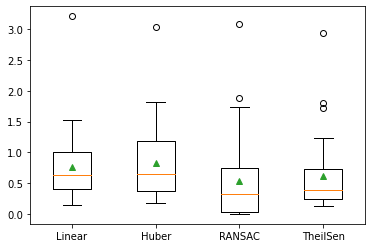

In [56]:

# compare robust regression algorithms on a regression dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
 
# dictionary of model names and model objects
def get_models():
    models = dict()
    models['Linear'] = LinearRegression()
    models['Huber'] = HuberRegressor()
    models['RANSAC'] = RANSACRegressor()
    models['TheilSen'] = TheilSenRegressor()
    return models
 
# evaluate a model
def evalute_model(X, y, model, name):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    scores = absolute(scores)
    return scores
 
# load the dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# retrieve models
models = get_models()
results = dict()
for name, model in models.items():
	# evaluate the model
	results[name] = evalute_model(X, y, model, name)
	# summarize progress
	print('>%s %.3f (%.3f)' % (name, mean(results[name]), std(results[name])))
# plot model performance for comparison
pyplot.boxplot(results.values(), labels=results.keys(), showmeans=True)
pyplot.show()

(17, 1)


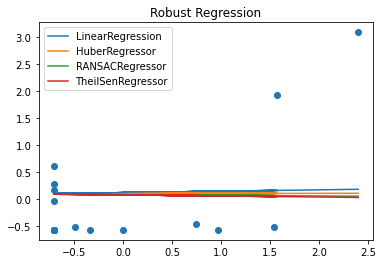

In [57]:
# plot line of best for multiple robust regression algorithms
from random import random
from random import randint
from random import seed
from numpy import arange
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from matplotlib import pyplot
 
# prepare the dataset
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

print (X.shape)

# dictionary of model names and model objects
def get_models():
	models = list()
	models.append(LinearRegression())
	models.append(HuberRegressor())
	models.append(RANSACRegressor())
	models.append(TheilSenRegressor())
	return models
 
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fit the model on all data
	model.fit(X.values.reshape(-1, 1), y)
	# calculate outputs for grid across the domain
	y_pred = model.predict(X.values.reshape(-1, 1))
	# plot the line of best fit
	pyplot.plot(X, y_pred, label=type(model).__name__)
 
# load the dataset
X = df_scaled['people_affected_per_100k']
y = df_scaled['economic_damages_as_a_share_of_gdp']

# define a uniform grid across the input domain
xaxis = arange(X.min(), X.max(), 0.01)
for model in get_models():

# plot the line of best fit
	plot_best_fit(X, y_pred, model)
# plot the dataset
pyplot.scatter(X, y)
# show the plot
pyplot.title('Robust Regression')
pyplot.legend()
pyplot.show()




### Training and testing the linear regression model

In [58]:
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k','temperature_change_temp_change_celsius', 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
#Entreno el modelo
model = regr.fit(X_train, y_train)

In [59]:
#Realizo una predicción
Y_pred_multiple = regr.predict(X_test)

In [60]:
print(Y_pred_multiple)
print(y_test)

[-1.09541547 -0.34083005 -1.49438185 -0.17451364]
14    0.164690
8    -0.568778
15   -0.566443
0    -0.568778
Name: economic_damages_as_a_share_of_gdp, dtype: float64


In [61]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(regr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(regr.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[ 0.28691017 -0.52735275  0.91386752]
Valor de la intersección o coeficiente "b":
-0.09210776241198458


In [62]:
print('Precisión del modelo:')
print(regr.score(X_train, y_train))

Precisión del modelo:
0.7493868309984488


In [63]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                                    OLS Regression Results                                    
Dep. Variable:     economic_damages_as_a_share_of_gdp   R-squared:                       0.749
Model:                                            OLS   Adj. R-squared:                  0.666
Method:                                 Least Squares   F-statistic:                     8.971
Date:                                Sat, 27 Aug 2022   Prob (F-statistic):            0.00455
Time:                                        17:20:18   Log-Likelihood:                -10.728
No. Observations:                                  13   AIC:                             29.46
Df Residuals:                                       9   BIC:                             31.72
Df Model:                                           3                                         
Covariance Type:                            nonrobust                                         
                                             coef 

C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [64]:
print(modelo.pvalues)

const                                     0.654310
people_affected_per_100k                  0.250776
temperature_change_temp_change_celsius    0.103631
number_of_deaths                          0.010447
dtype: float64


In [65]:
# Intervalos de confianza para los coeficientes del modelo
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-0.542070,0.357854
people_affected_per_100k,-0.241841,0.815661
temperature_change_temp_change_celsius,-1.186214,0.131508
number_of_deaths,0.272349,1.555386


### Complete model without split

In [66]:
# Set independent and dependent variables
X = df_scaled[['annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 1.9999444809891664e-17
Coefficients: [ 0.099289   -0.15424386  0.19967551  0.74067938  0.08108011 -0.14451363
 -0.12502166]


## Model Validation

In [67]:
X = df_scaled[['annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
X = sm.add_constant(X) # adding a constant

olsmod_scaled = sm.OLS(df_scaled['economic_damages_as_a_share_of_gdp'], X).fit()
print(olsmod_scaled.summary())

                                    OLS Regression Results                                    
Dep. Variable:     economic_damages_as_a_share_of_gdp   R-squared:                       0.705
Model:                                            OLS   Adj. R-squared:                  0.475
Method:                                 Least Squares   F-statistic:                     3.066
Date:                                Sat, 27 Aug 2022   Prob (F-statistic):             0.0605
Time:                                        17:20:26   Log-Likelihood:                -13.758
No. Observations:                                  17   AIC:                             43.52
Df Residuals:                                       9   BIC:                             50.18
Df Model:                                           7                                         
Covariance Type:                            nonrobust                                         
                                                  

C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


In [68]:
print('R2 score:', olsmod_scaled.rsquared)

R2 score: 0.7045641572962918


In [69]:
print('F-statistic:', olsmod_scaled.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod_scaled.f_pvalue)

F-statistic: 3.066209549755215
Probability of observing value at least as high as F-statistic: 0.06046520625122742


In [70]:
print(olsmod_scaled.pvalues)

const                                             1.000000
annual_co2_emissions_tons                         0.769527
inflation_inflation_gdp_deflation                 0.476573
people_affected_per_100k                          0.523482
number_of_deaths                                  0.049659
population_population_growth_annual_percentage    0.823115
population_population_total                       0.697111
temperature_change_temp_change_celsius            0.681263
dtype: float64


-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

### Modelo OLS

In [71]:
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 4.611334330100534e-17
Coefficients: [0.61737685]


In [72]:
X = df_scaled[['people_affected_per_100k',]]
X = sm.add_constant(X) # adding a constant

olsmod_scaled = sm.OLS(df_scaled['economic_damages_as_a_share_of_gdp'], X).fit()
print(olsmod_scaled.summary())

                                    OLS Regression Results                                    
Dep. Variable:     economic_damages_as_a_share_of_gdp   R-squared:                       0.381
Model:                                            OLS   Adj. R-squared:                  0.340
Method:                                 Least Squares   F-statistic:                     9.239
Date:                                Sat, 27 Aug 2022   Prob (F-statistic):            0.00828
Time:                                        17:20:29   Log-Likelihood:                -20.043
No. Observations:                                  17   AIC:                             44.09
Df Residuals:                                      15   BIC:                             45.75
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                               coef    std err    

C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


In [73]:
print('R2 score:', olsmod_scaled.rsquared)

R2 score: 0.38115417274810826


In [74]:
print('F-statistic:', olsmod_scaled.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod_scaled.f_pvalue)

F-statistic: 9.238670343162028
Probability of observing value at least as high as F-statistic: 0.008278551558010322


In [75]:
print(olsmod_scaled.pvalues)

const                       1.000000
people_affected_per_100k    0.008279
dtype: float64


In [76]:
df_scaled['residual'] = olsmod_scaled.resid

### Assumption Testing

#### Linearity:
This assumes that there is a linear relationship between the independent variables and the dependent variable. In our case since we have multiple independent variables, we can do this by using a scatter plot to see our predicted values versus the actual values.

In [77]:
df_scaled['predictions'] = olsmod.predict(X)

C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


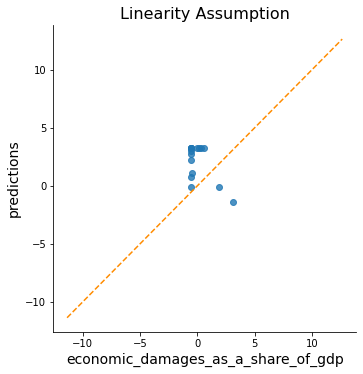

In [78]:
# Plotting the observed vs predicted values
sb.lmplot(x='economic_damages_as_a_share_of_gdp', y='predictions', data=df_scaled, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df_scaled[['economic_damages_as_a_share_of_gdp', 'predictions']].min().min()-10, 
                        df_scaled[['economic_damages_as_a_share_of_gdp', 'predictions']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('predictions', fontsize=14)
plt.xlabel('economic_damages_as_a_share_of_gdp', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

The scatter plots show residual point dont spread around the diagonal line, so we can assume that there isnt linear relationship between our independent and dependent variables.

#### Normality:
This assumes that the error terms of the model are normally distributed. We will examine the normality of the residuals by plotting it into histogram and looking at the p-value from the Anderson-Darling test for normality. 

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.436703584006235


C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


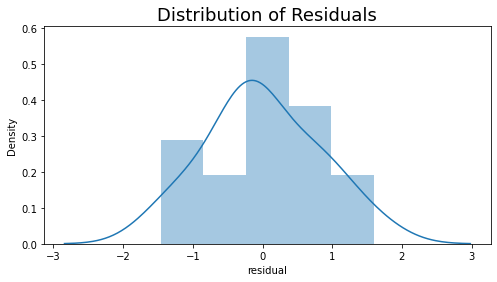

Residuals are normally distributed


In [79]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df_scaled['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sb.distplot(df_scaled['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

#### Multicollinearity:
This assumes that the predictors used in the regression are not correlated with each other. To identify if there are any correlation between our predictors we can calculate the Pearson correlation coefficient between each column in our data

Pearson correlation coefficient matrix of each variables:
                                     people_affected_per_100k  \
people_affected_per_100k                            1.000000   
economic_damages_as_a_share_of_gdp                  0.617377   

                                    economic_damages_as_a_share_of_gdp  
people_affected_per_100k                                      0.617377  
economic_damages_as_a_share_of_gdp                            1.000000  


C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


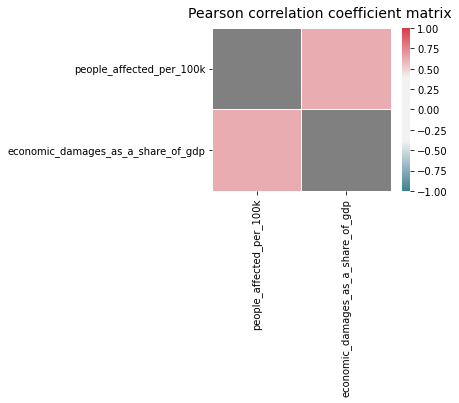

In [80]:
corr = df_scaled[['people_affected_per_100k','economic_damages_as_a_share_of_gdp']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

#### Autocorrelation
Autocorrelation is correlation of the errors (residuals) over time. Used when data are collected over time to detect if autocorrelation is present. Autocorrelation exists if residuals in one time period are related to residuals in another period. We can detect autocorrelation by performing Durbin-Watson test to determine if either positive or negative correlation is present. In this step we will use the durbin_watson () function from statsmodel to calculate our Durbin-Watson score and then assess the value with the following condition:

If the Durbin-Watson score is less than 1.5 then there is a positive autocorrelation and the assumption is not satisfied


If the Durbin-Watson score is between 1.5 and 2.5 then there is no autocorrelation and the assumption is satisfied


If the Durbin-Watson score is more than 2.5 then there is a negative autocorrelation and the assumption is not satisfied

In [81]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df_scaled['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.4782502867288319
Signs of positive autocorrelation 

Assumption not satisfied


#### Homoscedasticity
This assumes homoscedasticity, which is the same variance within our error terms. Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms. To detect homoscedasticity, we can plot our residual and see if the variance appears to be uniform.

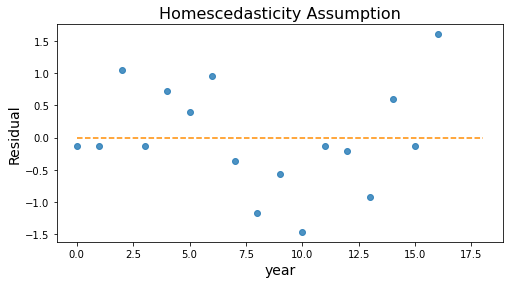

In [82]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=df_scaled.index, y=df_scaled.residual, alpha=0.8)
plt.plot(np.repeat(0, len(df_scaled.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()  

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

### Huber Model

In [83]:
# huber regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
 
# load dataset
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# define the model
model = HuberRegressor()
#Entreno el modelo
model_hu = model.fit(X_train, y_train)

#Realizo una predicción
Y_pred = regr.predict(X_test)

# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))

Mean MAE: 0.822 (0.615)


In [84]:
print(Y_pred)
print(y_test)

[ 0.59984269 -0.30250072 -0.43874164 -0.43874164]
8    -0.568778
12   -0.506688
11   -0.568778
4     0.285202
Name: economic_damages_as_a_share_of_gdp, dtype: float64


In [85]:
print('Intercept:', model_hu.intercept_)
print('Coefficients:', model_hu.coef_)

Intercept: 0.13569966757830504
Coefficients: [0.8467057]


In [86]:
print('Precisión del modelo:')
print(model_hu.score(X_train, y_train))

Precisión del modelo:
0.4475665214751937
